In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [12]:
os.chdir('E:\\坚果云\\IEEE ISI World Cup 2019\\特征文件')

In [14]:
feature1 = pd.read_excel('上市信息财务信息盈利能力指标_特征.xlsx')
display(feature1.head())
feature2 = pd.read_excel('一般纳税人_特征.xlsx')
display(feature2.head())

,企业编号,净利率增长率,净资产收益率增长率,加权净利率,加权净资产收益率,加权总资产收益率,加权毛利率,总资产收益率增长率,毛利率增长率
0,1001,-0.146500,0.534667,34.5598,9.1283,0.5915,NaN,0.023167,NaN
1,1002,0.679000,0.697167,21.2819,6.7332,4.3292,35.3461,0.506333,1.040333
2,1003,-0.607500,-0.259000,2.8286,3.6688,0.9814,12.3577,-0.193833,0.222833
3,1004,0.621333,0.202833,25.8124,7.1161,3.9972,53.0569,0.089333,0.261333
4,1005,0.315167,0.295500,6.8783,3.0345,0.8124,33.2608,0.066833,0.105500


,企业编号,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,...,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x1_16,x1_17,x1_18,x1_19
0,1001,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1002,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1004,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1005,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
label = pd.read_excel('企业评分.xlsx')
display(label.head())

,企业编号,企业总评分
0,1001,75.374276
1,1002,79.830122
2,1003,78.318264
3,1004,83.253376
4,1005,83.291493


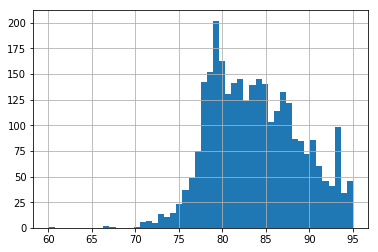

In [61]:
label['企业总评分'].hist(bins=50)

In [62]:
data = pd.merge(label, feature2, how='left')
display(data.head())

,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x1_16,x1_17,x1_18,x1_19
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002,79.830122,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1003,78.318264,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1004,83.253376,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1005,83.291493,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
data = pd.merge(data, feature1, how='left')
display(data.head())

,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,x1_18,x1_19,净利率增长率,净资产收益率增长率,加权净利率,加权净资产收益率,加权总资产收益率,加权毛利率,总资产收益率增长率,毛利率增长率
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0,0,-0.146500,0.534667,34.5598,9.1283,0.5915,NaN,0.023167,NaN
1,1002,79.830122,0,2,0,0,0,0,0,0,...,0,0,0.679000,0.697167,21.2819,6.7332,4.3292,35.3461,0.506333,1.040333
2,1003,78.318264,0,0,0,0,0,0,0,0,...,0,0,-0.607500,-0.259000,2.8286,3.6688,0.9814,12.3577,-0.193833,0.222833
3,1004,83.253376,0,1,0,0,0,0,0,0,...,1,0,0.621333,0.202833,25.8124,7.1161,3.9972,53.0569,0.089333,0.261333
4,1005,83.291493,0,1,0,0,0,0,0,0,...,0,1,0.315167,0.295500,6.8783,3.0345,0.8124,33.2608,0.066833,0.105500


In [64]:
def merge_features(path, label):
    data = label
    const_xlsx_file = ".xlsx"
    for filename in os.listdir(path):
        if filename == '企业评分.xlsx':
            continue
        if os.path.splitext(filename)[1] == const_xlsx_file:
            feature = pd.read_excel(filename)
            display(feature.head())
            data = pd.merge(data, feature, how='left')
            display(data.head())
    
    return data

label = pd.read_excel('企业评分.xlsx')        
path = os.getcwd()
print(os.listdir(path))
data_input = merge_features(path, label)

# display(data_input.head())
# print(data_input.shape)

['.ipynb_checkpoints', '.vs', 'feature.ipynb', '一般纳税人.ipynb', '一般纳税人_特征.xlsx', '上市信息财务信息-利润表_特征.xlsx', '上市信息财务信息-成长能力指标_特征.xlsx', '上市信息财务信息-财务风险指标_特征.xlsx', '上市信息财务信息盈利能力指标_特征.xlsx', '上市信息财务信息运营能力指标_特征.xlsx', '上市公司财务信息-每股指标_特征.xlsx', '产品_特征.xlsx', '企业评分.xlsx', '债券信息.ipynb', '债券信息_特征.xlsx', '工商基本信息_特征.xlsx', '年报-企业基本信息.ipynb', '年报-企业基本信息_特征.xlsx', '年报-社保信息_特征.xlsx', '年报-股东（发起人）及出资信息_特征.xlsx', '海关进出口信用_特征.xlsx', '纳税A级年份_特征.xlsx', '融资信息_特征.xlsx']


,企业编号,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,...,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x1_16,x1_17,x1_18,x1_19
0,1001,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1002,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1004,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1005,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,x1_10,x1_11,x1_12,x1_13,x1_14,x1_15,x1_16,x1_17,x1_18,x1_19
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002,79.830122,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1003,78.318264,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1004,83.253376,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1005,83.291493,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,企业编号,利润总额增长率,加权利润总额,加权管理费用,加权营业成本,加权销售费用,管理费用增长率,营业成本增长率,销售成本增长率
0,1001,1.250229e+09,4.282825e+10,2.443280e+10,NaN,NaN,9.582857e+07,NaN,NaN
1,1002,6.942252e+07,1.204435e+09,2.454372e+08,2.841357e+09,3.259467e+07,-2.839305e+06,-1.882259e+08,7.209246e+06
2,1003,-1.025224e+08,1.311452e+08,6.029842e+08,7.832934e+09,4.576555e+08,5.625688e+07,8.286113e+08,6.885078e+07
3,1004,-3.123571e+07,5.841297e+08,5.982827e+07,8.374864e+08,4.342078e+07,6.472989e+06,-2.784940e+07,4.615030e+06
4,1005,-6.655621e+06,5.587802e+08,7.906109e+08,3.776306e+09,1.737038e+07,1.084168e+07,-9.332693e+07,5.495738e+06


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,x1_18,x1_19,利润总额增长率,加权利润总额,加权管理费用,加权营业成本,加权销售费用,管理费用增长率,营业成本增长率,销售成本增长率
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0,0,1.250229e+09,4.282825e+10,2.443280e+10,NaN,NaN,9.582857e+07,NaN,NaN
1,1002,79.830122,0,2,0,0,0,0,0,0,...,0,0,6.942252e+07,1.204435e+09,2.454372e+08,2.841357e+09,3.259467e+07,-2.839305e+06,-1.882259e+08,7.209246e+06
2,1003,78.318264,0,0,0,0,0,0,0,0,...,0,0,-1.025224e+08,1.311452e+08,6.029842e+08,7.832934e+09,4.576555e+08,5.625688e+07,8.286113e+08,6.885078e+07
3,1004,83.253376,0,1,0,0,0,0,0,0,...,1,0,-3.123571e+07,5.841297e+08,5.982827e+07,8.374864e+08,4.342078e+07,6.472989e+06,-2.784940e+07,4.615030e+06
4,1005,83.291493,0,1,0,0,0,0,0,0,...,0,1,-6.655621e+06,5.587802e+08,7.906109e+08,3.776306e+09,1.737038e+07,1.084168e+07,-9.332693e+07,5.495738e+06


,企业编号,加权扣非净利润,加权扣非净利润同比增长,加权营业总收入,加权营业总收入滚动环比增长,加权营收总收入同比增长,扣非净利润滚动环比增长
0,1001,344.330000,3.8821,1030.8100,0.8730,0.7941,0.9527
1,1002,8.772100,-0.7462,43.5260,3.6547,12.4069,-3.4746
2,1003,2.185098,83.2580,87.5640,-3.6795,-14.3320,27.2786
3,1004,4.580400,18.2584,17.6342,3.4696,17.4917,3.7953
4,1005,2.893778,0.6310,55.5950,4.3546,18.7324,3.5399


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,加权销售费用,管理费用增长率,营业成本增长率,销售成本增长率,加权扣非净利润,加权扣非净利润同比增长,加权营业总收入,加权营业总收入滚动环比增长,加权营收总收入同比增长,扣非净利润滚动环比增长
0,1001,75.374276,0,1,0,0,0,0,0,0,...,NaN,9.582857e+07,NaN,NaN,344.330000,3.8821,1030.8100,0.8730,0.7941,0.9527
1,1002,79.830122,0,2,0,0,0,0,0,0,...,3.259467e+07,-2.839305e+06,-1.882259e+08,7.209246e+06,8.772100,-0.7462,43.5260,3.6547,12.4069,-3.4746
2,1003,78.318264,0,0,0,0,0,0,0,0,...,4.576555e+08,5.625688e+07,8.286113e+08,6.885078e+07,2.185098,83.2580,87.5640,-3.6795,-14.3320,27.2786
3,1004,83.253376,0,1,0,0,0,0,0,0,...,4.342078e+07,6.472989e+06,-2.784940e+07,4.615030e+06,4.580400,18.2584,17.6342,3.4696,17.4917,3.7953
4,1005,83.291493,0,1,0,0,0,0,0,0,...,1.737038e+07,1.084168e+07,-9.332693e+07,5.495738e+06,2.893778,0.6310,55.5950,4.3546,18.7324,3.5399


,企业编号,加权流动比率,加权流动负债,加权资产负债率,加权速动比率,流动比率增长率,流动负债增长率,资产负债率增长率,速动比率增长率
0,1001,NaN,0.0000,92.8854,NaN,NaN,0.000000,0.142667,NaN
1,1002,0.6866,66.7778,37.9629,0.6741,0.050667,-3.961500,-0.657000,0.048500
2,1003,1.2844,93.6653,60.2937,1.0998,-0.035167,-1.075333,1.026000,-0.033500
3,1004,0.4922,45.9687,42.7027,0.4793,-0.038500,0.241667,0.616833,-0.037333
4,1005,0.7976,45.7977,68.2321,0.7122,0.111667,-0.922333,-0.321667,0.078500


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,加权营收总收入同比增长,扣非净利润滚动环比增长,加权流动比率,加权流动负债,加权资产负债率,加权速动比率,流动比率增长率,流动负债增长率,资产负债率增长率,速动比率增长率
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0.7941,0.9527,NaN,0.0000,92.8854,NaN,NaN,0.000000,0.142667,NaN
1,1002,79.830122,0,2,0,0,0,0,0,0,...,12.4069,-3.4746,0.6866,66.7778,37.9629,0.6741,0.050667,-3.961500,-0.657000,0.048500
2,1003,78.318264,0,0,0,0,0,0,0,0,...,-14.3320,27.2786,1.2844,93.6653,60.2937,1.0998,-0.035167,-1.075333,1.026000,-0.033500
3,1004,83.253376,0,1,0,0,0,0,0,0,...,17.4917,3.7953,0.4922,45.9687,42.7027,0.4793,-0.038500,0.241667,0.616833,-0.037333
4,1005,83.291493,0,1,0,0,0,0,0,0,...,18.7324,3.5399,0.7976,45.7977,68.2321,0.7122,0.111667,-0.922333,-0.321667,0.078500


,企业编号,净利率增长率,净资产收益率增长率,加权净利率,加权净资产收益率,加权总资产收益率,加权毛利率,总资产收益率增长率,毛利率增长率
0,1001,-0.146500,0.534667,34.5598,9.1283,0.5915,NaN,0.023167,NaN
1,1002,0.679000,0.697167,21.2819,6.7332,4.3292,35.3461,0.506333,1.040333
2,1003,-0.607500,-0.259000,2.8286,3.6688,0.9814,12.3577,-0.193833,0.222833
3,1004,0.621333,0.202833,25.8124,7.1161,3.9972,53.0569,0.089333,0.261333
4,1005,0.315167,0.295500,6.8783,3.0345,0.8124,33.2608,0.066833,0.105500


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,资产负债率增长率,速动比率增长率,净利率增长率,净资产收益率增长率,加权净利率,加权净资产收益率,加权总资产收益率,加权毛利率,总资产收益率增长率,毛利率增长率
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0.142667,NaN,-0.146500,0.534667,34.5598,9.1283,0.5915,NaN,0.023167,NaN
1,1002,79.830122,0,2,0,0,0,0,0,0,...,-0.657000,0.048500,0.679000,0.697167,21.2819,6.7332,4.3292,35.3461,0.506333,1.040333
2,1003,78.318264,0,0,0,0,0,0,0,0,...,1.026000,-0.033500,-0.607500,-0.259000,2.8286,3.6688,0.9814,12.3577,-0.193833,0.222833
3,1004,83.253376,0,1,0,0,0,0,0,0,...,0.616833,-0.037333,0.621333,0.202833,25.8124,7.1161,3.9972,53.0569,0.089333,0.261333
4,1005,83.291493,0,1,0,0,0,0,0,0,...,-0.321667,0.078500,0.315167,0.295500,6.8783,3.0345,0.8124,33.2608,0.066833,0.105500


,企业编号,加权存货周转天数,加权应收账款周转天数,加权总资产周转率,存货周转天数增长率,应收账款周转天数增长率,总资产周转率增长率
0,1001,NaN,NaN,0.0169,NaN,NaN,0.000667
1,1002,6.1703,47.4813,0.2064,0.190500,-0.614667,0.016167
2,1003,56.8446,100.8754,0.4595,-1.527833,-9.542167,0.014167
3,1004,6.7094,26.9741,0.1551,0.205000,-0.711333,-0.001500
4,1005,79.8608,94.9507,0.1117,29.271833,-0.640667,0.004167


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,加权总资产收益率,加权毛利率,总资产收益率增长率,毛利率增长率,加权存货周转天数,加权应收账款周转天数,加权总资产周转率,存货周转天数增长率,应收账款周转天数增长率,总资产周转率增长率
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0.5915,NaN,0.023167,NaN,NaN,NaN,0.0169,NaN,NaN,0.000667
1,1002,79.830122,0,2,0,0,0,0,0,0,...,4.3292,35.3461,0.506333,1.040333,6.1703,47.4813,0.2064,0.190500,-0.614667,0.016167
2,1003,78.318264,0,0,0,0,0,0,0,0,...,0.9814,12.3577,-0.193833,0.222833,56.8446,100.8754,0.4595,-1.527833,-9.542167,0.014167
3,1004,83.253376,0,1,0,0,0,0,0,0,...,3.9972,53.0569,0.089333,0.261333,6.7094,26.9741,0.1551,0.205000,-0.711333,-0.001500
4,1005,83.291493,0,1,0,0,0,0,0,0,...,0.8124,33.2608,0.066833,0.105500,79.8608,94.9507,0.1117,29.271833,-0.640667,0.004167


,企业编号,加权每股净资产,加权每股收益,加权每股未分配利润,加权每股经营现金流,每股净资产增长率,每股收益增长率,每股未分配利润增长率,每股经营现金流增长率
0,1001,14.184760,1.242620,4.123034,-6.871006,0.207967,0.092733,0.028522,-0.208952
1,1002,7.909473,0.507500,3.222183,0.935942,0.287553,0.075667,0.260508,0.040468
2,1003,3.400827,0.123588,1.700587,-0.305869,-0.033132,-0.009563,-0.026078,0.043837
3,1004,6.445557,0.448900,3.086557,0.821458,-0.087435,0.003667,-0.087435,-0.001577
4,1005,1.683978,0.068631,0.400503,0.255688,-0.025363,0.002570,-0.000890,0.014393


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,应收账款周转天数增长率,总资产周转率增长率,加权每股净资产,加权每股收益,加权每股未分配利润,加权每股经营现金流,每股净资产增长率,每股收益增长率,每股未分配利润增长率,每股经营现金流增长率
0,1001,75.374276,0,1,0,0,0,0,0,0,...,NaN,0.000667,14.184760,1.242620,4.123034,-6.871006,0.207967,0.092733,0.028522,-0.208952
1,1002,79.830122,0,2,0,0,0,0,0,0,...,-0.614667,0.016167,7.909473,0.507500,3.222183,0.935942,0.287553,0.075667,0.260508,0.040468
2,1003,78.318264,0,0,0,0,0,0,0,0,...,-9.542167,0.014167,3.400827,0.123588,1.700587,-0.305869,-0.033132,-0.009563,-0.026078,0.043837
3,1004,83.253376,0,1,0,0,0,0,0,0,...,-0.711333,-0.001500,6.445557,0.448900,3.086557,0.821458,-0.087435,0.003667,-0.087435,-0.001577
4,1005,83.291493,0,1,0,0,0,0,0,0,...,-0.640667,0.004167,1.683978,0.068631,0.400503,0.255688,-0.025363,0.002570,-0.000890,0.014393


,企业编号,website,ios,android,wechat,weibo,miniapp
0,1001,10,10,4,0,0,0
1,1002,4,6,1,1,1,0
2,1003,1,0,0,1,1,0
3,1004,6,2,2,0,0,0
4,1005,0,0,0,0,0,0


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,每股净资产增长率,每股收益增长率,每股未分配利润增长率,每股经营现金流增长率,website,ios,android,wechat,weibo,miniapp
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0.207967,0.092733,0.028522,-0.208952,10,10,4,0,0,0
1,1002,79.830122,0,2,0,0,0,0,0,0,...,0.287553,0.075667,0.260508,0.040468,4,6,1,1,1,0
2,1003,78.318264,0,0,0,0,0,0,0,0,...,-0.033132,-0.009563,-0.026078,0.043837,1,0,0,1,1,0
3,1004,83.253376,0,1,0,0,0,0,0,0,...,-0.087435,0.003667,-0.087435,-0.001577,6,2,2,0,0,0
4,1005,83.291493,0,1,0,0,0,0,0,0,...,-0.025363,0.002570,-0.000890,0.014393,0,0,0,0,0,0


,企业编号,债券信用评级,银行间企债:短,银行间企债:中,银行间企债:长,中央企业债:中,中央企业债:长,地方企业债:中,地方企业债:长,公司、企业债:中,公司、企业债:长,沪企债:中,沪企债:长,深企债:短,深企债:中,深企债:长,企业债券:中,企业债券:长
0,1001,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0
1,1002,0,38.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0
2,1003,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0
3,1004,21,5.0,5.0,0,0,10,0,0.0,9.0,0.0,0.0,0,0,0.0,0,0.0,0
4,1005,7,20.0,40.0,0,0,0,0,0.0,10.0,0.0,0.0,0,0,0.0,0,0.0,0


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,地方企业债:长,公司、企业债:中,公司、企业债:长,沪企债:中,沪企债:长,深企债:短,深企债:中,深企债:长,企业债券:中,企业债券:长
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0
1,1002,79.830122,0,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0
2,1003,78.318264,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0
3,1004,83.253376,0,1,0,0,0,0,0,0,...,0.0,9.0,0.0,0.0,0,0,0.0,0,0.0,0
4,1005,83.291493,0,1,0,0,0,0,0,0,...,0.0,10.0,0.0,0.0,0,0,0.0,0,0.0,0


,企业编号,注册资本（万元）,成立时长,经营状态,行业大类（代码）,行业小类（代码）,类型,省份代码,城市代码,地区代码,是否上市,登记机关区域代码,员工人数,注销原因,注销时间
0,1001,746.14,27,1,10.0,66.0,1,31,3100,310000,1,310100.0,19.0,0,0
1,1002,82.77,19,1,15.0,80.0,1,44,4400,440000,1,440000.0,12.0,0,0
2,1003,80.00,20,1,3.0,36.0,1,42,4200,420000,1,420000.0,11.0,0,0
3,1004,40.29,22,1,6.0,52.0,1,11,1101,110105,1,100000.0,15.0,0,0
4,1005,227.42,20,1,12.0,72.0,1,11,1101,110102,1,110100.0,15.0,0,0


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,行业小类（代码）,类型,省份代码,城市代码,地区代码,是否上市,登记机关区域代码,员工人数,注销原因,注销时间
0,1001,75.374276,0,1,0,0,0,0,0,0,...,66.0,1,31,3100,310000,1,310100.0,19.0,0,0
1,1002,79.830122,0,2,0,0,0,0,0,0,...,80.0,1,44,4400,440000,1,440000.0,12.0,0,0
2,1003,78.318264,0,0,0,0,0,0,0,0,...,36.0,1,42,4200,420000,1,420000.0,11.0,0,0
3,1004,83.253376,0,1,0,0,0,0,0,0,...,52.0,1,11,1101,110105,1,100000.0,15.0,0,0
4,1005,83.291493,0,1,0,0,0,0,0,0,...,72.0,1,11,1101,110102,1,110100.0,15.0,0,0


,企业编号,是否有网站或网点,企业是否有投资信息或购买其他公司股权,有限责任公司本年度是否发生股东股权转,是否提供对外担保
0,1001,1,1,1,0
1,1002,1,1,1,0
2,1003,1,0,0,0
3,1004,1,0,0,0
4,1005,1,1,0,0


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,地区代码,是否上市,登记机关区域代码,员工人数,注销原因,注销时间,是否有网站或网点,企业是否有投资信息或购买其他公司股权,有限责任公司本年度是否发生股东股权转,是否提供对外担保
0,1001,75.374276,0,1,0,0,0,0,0,0,...,310000,1,310100.0,19.0,0,0,1,1,1,0
1,1002,79.830122,0,2,0,0,0,0,0,0,...,440000,1,440000.0,12.0,0,0,1,1,1,0
2,1003,78.318264,0,0,0,0,0,0,0,0,...,420000,1,420000.0,11.0,0,0,1,0,0,0
3,1004,83.253376,0,1,0,0,0,0,0,0,...,110105,1,100000.0,15.0,0,0,1,0,0,0
4,1005,83.291493,0,1,0,0,0,0,0,0,...,110102,1,110100.0,15.0,0,0,1,1,0,0


,企业编号,城镇职工基本养老保险人数
0,1001,21136.0
1,1003,6992.0
2,1004,1066.0
3,1005,218.0
4,1006,2040.5


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,是否上市,登记机关区域代码,员工人数,注销原因,注销时间,是否有网站或网点,企业是否有投资信息或购买其他公司股权,有限责任公司本年度是否发生股东股权转,是否提供对外担保,城镇职工基本养老保险人数
0,1001,75.374276,0,1,0,0,0,0,0,0,...,1,310100.0,19.0,0,0,1,1,1,0,21136.0
1,1002,79.830122,0,2,0,0,0,0,0,0,...,1,440000.0,12.0,0,0,1,1,1,0,NaN
2,1003,78.318264,0,0,0,0,0,0,0,0,...,1,420000.0,11.0,0,0,1,0,0,0,6992.0
3,1004,83.253376,0,1,0,0,0,0,0,0,...,1,100000.0,15.0,0,0,1,0,0,0,1066.0
4,1005,83.291493,0,1,0,0,0,0,0,0,...,1,110100.0,15.0,0,0,1,1,0,0,218.0


,企业编号,实缴出资额
0,1001,786044.12
1,1002,66692.70
2,1003,120200.00
3,1004,92728.00
4,1005,140411.90


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,登记机关区域代码,员工人数,注销原因,注销时间,是否有网站或网点,企业是否有投资信息或购买其他公司股权,有限责任公司本年度是否发生股东股权转,是否提供对外担保,城镇职工基本养老保险人数,实缴出资额
0,1001,75.374276,0,1,0,0,0,0,0,0,...,310100.0,19.0,0,0,1,1,1,0,21136.0,786044.12
1,1002,79.830122,0,2,0,0,0,0,0,0,...,440000.0,12.0,0,0,1,1,1,0,NaN,66692.70
2,1003,78.318264,0,0,0,0,0,0,0,0,...,420000.0,11.0,0,0,1,0,0,0,6992.0,120200.00
3,1004,83.253376,0,1,0,0,0,0,0,0,...,100000.0,15.0,0,0,1,0,0,0,1066.0,92728.00
4,1005,83.291493,0,1,0,0,0,0,0,0,...,110100.0,15.0,0,0,1,1,0,0,218.0,140411.90


,企业编号,经济区划,经营类别,海关注销标志,年报情况,信用等级
0,1001,0,0,0,0,0
1,1002,7,2,0,0,0
2,1003,1,0,0,0,0
3,1004,0,0,0,0,0
4,1005,0,0,0,0,0


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,企业是否有投资信息或购买其他公司股权,有限责任公司本年度是否发生股东股权转,是否提供对外担保,城镇职工基本养老保险人数,实缴出资额,经济区划,经营类别,海关注销标志,年报情况,信用等级
0,1001,75.374276,0,1,0,0,0,0,0,0,...,1,1,0,21136.0,786044.12,0,0,0,0,0
1,1002,79.830122,0,2,0,0,0,0,0,0,...,1,1,0,NaN,66692.70,7,2,0,0,0
2,1003,78.318264,0,0,0,0,0,0,0,0,...,0,0,0,6992.0,120200.00,1,0,0,0,0
3,1004,83.253376,0,1,0,0,0,0,0,0,...,0,0,0,1066.0,92728.00,0,0,0,0,0
4,1005,83.291493,0,1,0,0,0,0,0,0,...,1,0,0,218.0,140411.90,0,0,0,0,0


,企业编号,纳税A级年份:2014,纳税A级年份:2015,纳税A级年份:2016,纳税A级年份:2017
0,1001,1,2,1,1
1,1002,1,1,2,0
2,1003,1,1,0,1
3,1004,0,0,2,1
4,1006,1,1,1,0


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,实缴出资额,经济区划,经营类别,海关注销标志,年报情况,信用等级,纳税A级年份:2014,纳税A级年份:2015,纳税A级年份:2016,纳税A级年份:2017
0,1001,75.374276,0,1,0,0,0,0,0,0,...,786044.12,0,0,0,0,0,1.0,2.0,1.0,1.0
1,1002,79.830122,0,2,0,0,0,0,0,0,...,66692.70,7,2,0,0,0,1.0,1.0,2.0,0.0
2,1003,78.318264,0,0,0,0,0,0,0,0,...,120200.00,1,0,0,0,0,1.0,1.0,0.0,1.0
3,1004,83.253376,0,1,0,0,0,0,0,0,...,92728.00,0,0,0,0,0,0.0,0.0,2.0,1.0
4,1005,83.291493,0,1,0,0,0,0,0,0,...,140411.90,0,0,0,0,0,NaN,NaN,NaN,NaN


,企业编号,IPO/上市距今时间,是否有战略投资/战略合并,是否被并购/收购,最近一次融资距今时间
0,1001,20,0,0,20
1,1002,16,1,0,2
2,1003,20,0,0,20
3,1004,20,0,0,20
4,1005,19,0,0,19


,企业编号,企业总评分,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,...,年报情况,信用等级,纳税A级年份:2014,纳税A级年份:2015,纳税A级年份:2016,纳税A级年份:2017,IPO/上市距今时间,是否有战略投资/战略合并,是否被并购/收购,最近一次融资距今时间
0,1001,75.374276,0,1,0,0,0,0,0,0,...,0,0,1.0,2.0,1.0,1.0,20,0,0,20
1,1002,79.830122,0,2,0,0,0,0,0,0,...,0,0,1.0,1.0,2.0,0.0,16,1,0,2
2,1003,78.318264,0,0,0,0,0,0,0,0,...,0,0,1.0,1.0,0.0,1.0,20,0,0,20
3,1004,83.253376,0,1,0,0,0,0,0,0,...,0,0,0.0,0.0,2.0,1.0,20,0,0,20
4,1005,83.291493,0,1,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,19,0,0,19


In [65]:
data_input.duplicated().sum()

585

In [66]:
data_input.drop_duplicates(inplace=True)
data_input.duplicated().sum()
print(data_input.shape)

(2956, 140)


In [67]:
limit_percent = 0.25
limit_value = len(data_input) * limit_percent
list(data_input.columns[data_input.isna().sum() > limit_value])

['扣非净利润滚动环比增长']

In [68]:
data_input.drop('扣非净利润滚动环比增长', axis=1, inplace=True)

In [69]:
missing_columns = list(data_input.columns[data_input.isna().sum() != 0])
print(missing_columns)

['利润总额增长率', '加权利润总额', '加权营业成本', '加权销售费用', '营业成本增长率', '销售成本增长率', '加权扣非净利润同比增长', '加权营业总收入滚动环比增长', '加权营收总收入同比增长', '加权流动比率', '加权速动比率', '流动比率增长率', '速动比率增长率', '净资产收益率增长率', '加权净资产收益率', '加权毛利率', '毛利率增长率', '加权存货周转天数', '加权应收账款周转天数', '加权总资产周转率', '存货周转天数增长率', '应收账款周转天数增长率', '总资产周转率增长率', '加权每股净资产', '加权每股未分配利润', '加权每股经营现金流', '每股净资产增长率', '每股未分配利润增长率', '每股经营现金流增长率', '行业大类（代码）', '行业小类（代码）', '城镇职工基本养老保险人数', '实缴出资额', '纳税A级年份:2014', '纳税A级年份:2015', '纳税A级年份:2016', '纳税A级年份:2017']


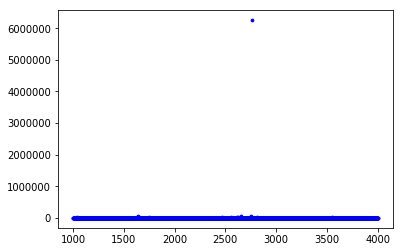

In [79]:
plt.scatter(data_input['企业编号'], data_input['加权存货周转天数'], c='blue', marker='.', s=30)
plt.show()

In [85]:
fill_median = ['利润总额增长率', '加权利润总额', '加权营业成本', '加权销售费用', '营业成本增长率', '销售成本增长率',
               '加权扣非净利润同比增长', '加权营业总收入滚动环比增长', '加权营收总收入同比增长', '加权流动比率',
               '加权速动比率', '流动比率增长率', '速动比率增长率', '净资产收益率增长率', '加权净资产收益率', 
               '加权毛利率', '毛利率增长率', '加权存货周转天数', '加权应收账款周转天数', '加权总资产周转率', 
               '存货周转天数增长率', '应收账款周转天数增长率', '总资产周转率增长率', '加权每股净资产',
               '加权每股未分配利润','加权每股经营现金流', '每股净资产增长率', '每股未分配利润增长率', 
               '每股经营现金流增长率','城镇职工基本养老保险人数', '实缴出资额']
fill_0 = ['行业大类（代码）', '行业小类（代码）','纳税A级年份:2014', '纳税A级年份:2015', '纳税A级年份:2016', '纳税A级年份:2017']

In [88]:
data_input[fill_median] = data_input[fill_median].fillna(data_input[fill_median].median())
data_input[fill_0] = data_input[fill_0].fillna(0)
missing_columns = list(data_input.columns[data_input.isna().sum() != 0])
print(missing_columns)

[]
